In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [ ]:
# Load and prepare dataset
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])


In [ ]:
# Explore data
print(df.head())
print(df.shape)
print(df.describe())
print(df.isnull().sum())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
(150, 5)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4

In [ ]:
# Add species names
df['target'] = df['target'].astype(int)
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [ ]:
# Split into features and target
X = df.drop(['target', 'species'], axis=1)
y = df['target']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


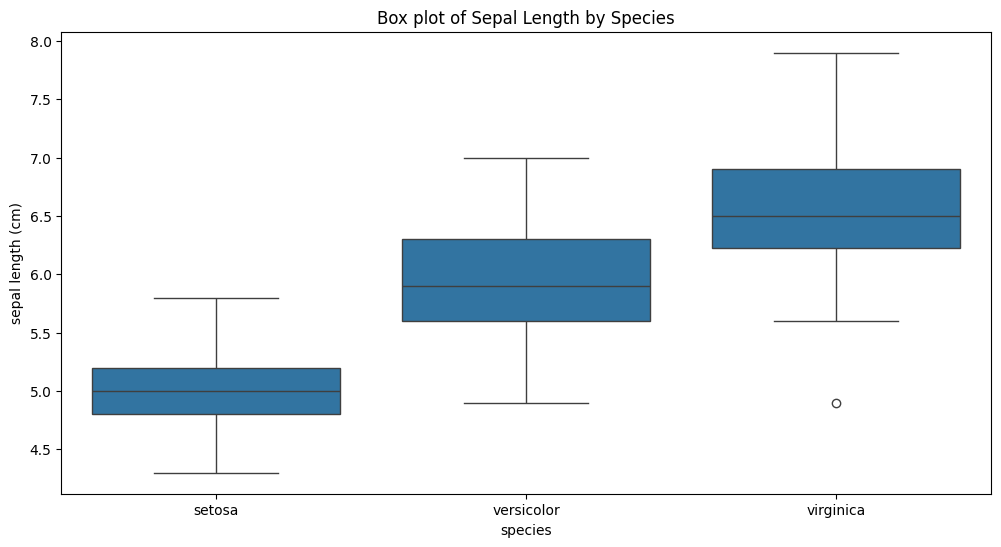

In [ ]:
# Boxplot before missing value imputation
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title('Box plot of Sepal Length by Species')
plt.show()

In [ ]:
# Introduce missing values
df.iloc[5:10, df.columns.get_loc('sepal length (cm)')] = np.nan
print(df.head(15))


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 NaN               3.9                1.7               0.4   
6                 NaN               3.4                1.4               0.3   
7                 NaN               3.4                1.5               0.2   
8                 NaN               2.9                1.4               0.2   
9                 NaN               3.1                1.5               0.1   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4 

In [ ]:
# Impute missing values using mean
df['sepal length (cm)'] = df['sepal length (cm)'].fillna(df['sepal length (cm)'].mean())


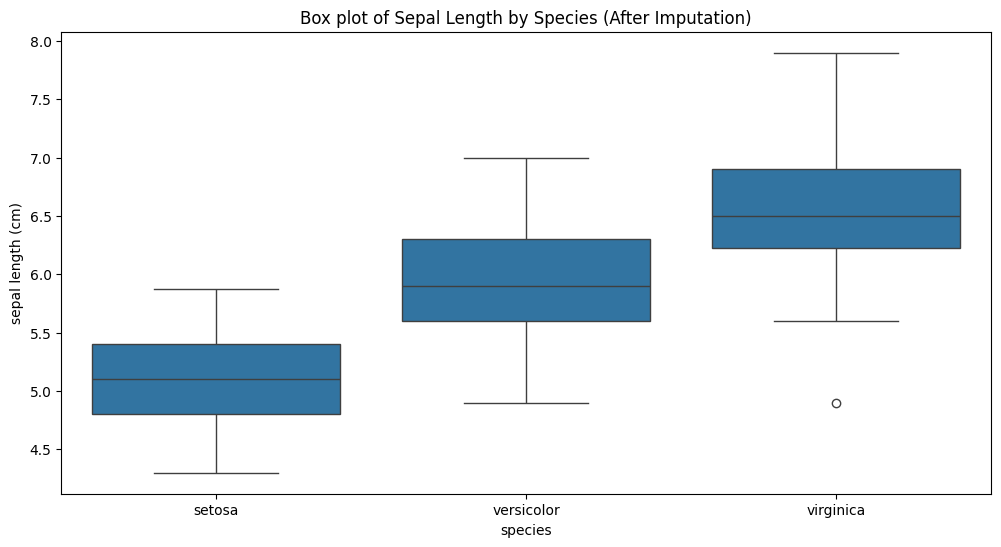

In [ ]:
# Boxplot after imputation
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title('Box plot of Sepal Length by Species (After Imputation)')
plt.show()

In [ ]:
# Summary statistics after imputation
print(df['sepal length (cm)'].describe())


count    150.000000
mean       5.877241
std        0.805080
min        4.300000
25%        5.200000
50%        5.838621
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64


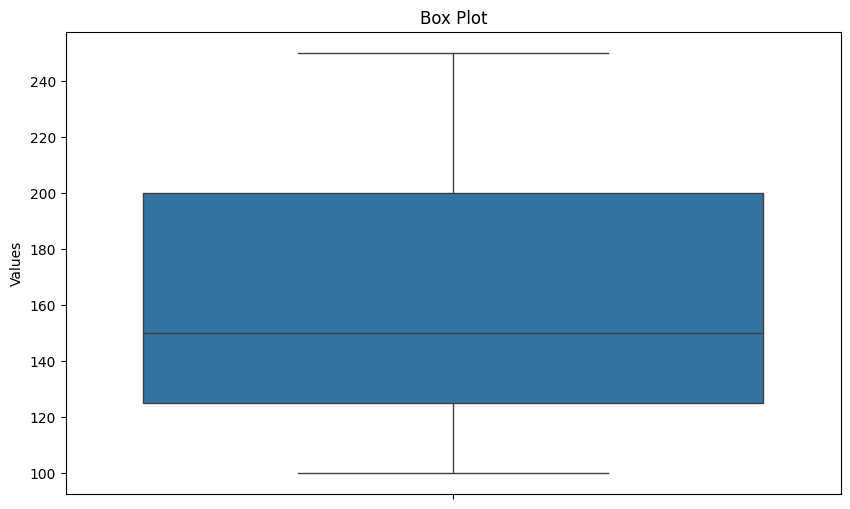

In [ ]:
# Boxplot of a sample data list
data = [100, 120, 130, 150, 180, 220, 250]
plt.figure(figsize=(10, 6))
sns.boxplot(y=data)
plt.title('Box Plot')
plt.ylabel('Values')
plt.show()


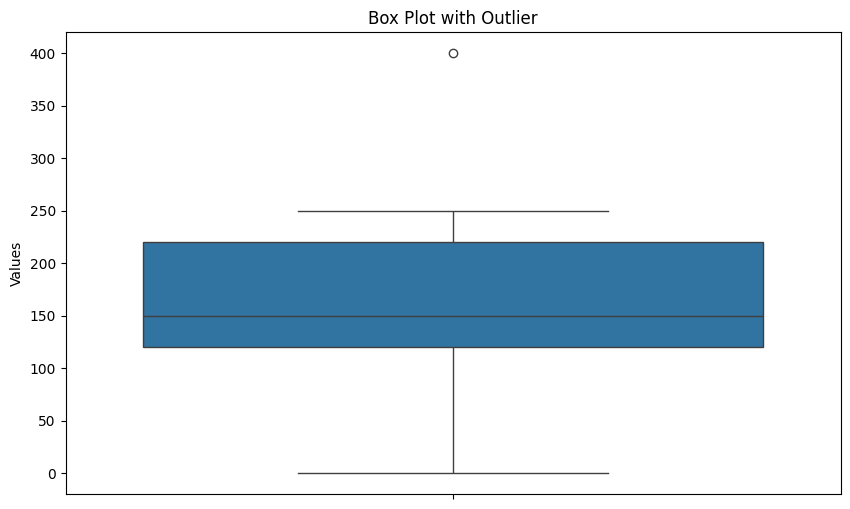

In [ ]:
# Boxplot with outlier
data = [0, 100, 120, 130, 150, 180, 220, 250, 400]
plt.figure(figsize=(10, 6))
sns.boxplot(y=data)
plt.title('Box Plot with Outlier')
plt.ylabel('Values')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'species' column
df['species_label'] = label_encoder.fit_transform(df['species'])

# View mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", label_mapping)

# Show a few rows
print(df[['species', 'species_label']].head())


Label Encoding Mapping: {'setosa': np.int64(0), 'versicolor': np.int64(1), 'virginica': np.int64(2)}
  species  species_label
0  setosa              0
1  setosa              0
2  setosa              0
3  setosa              0
4  setosa              0


In [ ]:
# Using pandas get_dummies
df_onehot = pd.get_dummies(df, columns=['species'])

# Show new columns
print(df_onehot.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  species_label  species_setosa  species_versicolor  \
0       0              0            True               False   
1       0              0            True               False   
2       0              0            True               False   
3       0              0            True               False   
4       0              0            True               False   

   species_virginica  
0              False  
1              False  
2              False  
3              False  
4              False  
